In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../')
import function
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_excel('../VisitorEntrancesV3.xlsx')

In [3]:
df = df[df.Site_Name=='The Masada']
df = function.remove_unique_one(df)
df = df.drop(df.filter(regex='Season').columns, axis=1)
df = df.drop(df.filter(regex='Exceeded').columns, axis=1)
df = df.drop(df.filter(regex='isHeatwave').columns, axis=1)
df = df.replace({True:1,False:0})

In [4]:
dfWithoutLastYearVisits = df.dropna().drop('last_year_visitors',axis=1)
dfLastYearVisits = df.dropna()

In [5]:
print(df.shape)
print(dfLastYearVisits.shape)
print(dfWithoutLastYearVisits.shape)

(1387, 8)
(1011, 8)
(1011, 7)


In [6]:
resTrain,resTest,coeffDf = function.mlrModelResTrainTestCoeff(dfLastYearVisits)

c:\Private\חדש למאמר\Git\nature-reserves-paper\Model MLR\..\function.py:285: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.dropna(inplace=True)


In [10]:
coeffDf


,0
Temperature,-698.62463
IsVacation,-555.90523
is_weekend,-131.05562
IsHoliday,143.60008
pm10,194.51282


rmse 691.0328710086147
std 809.1665472718446


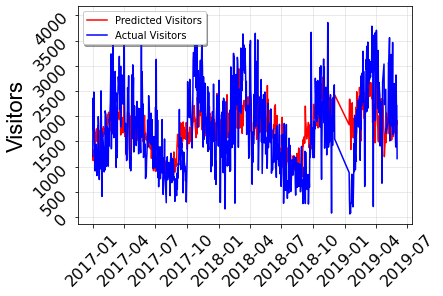

Sample rows:
             Prediction  Actual
Date                           
2019-05-27  1873.084681    1743
2019-01-19  1341.140621     272
2017-05-03  1811.484376    1804
2018-06-08  1646.449313    1581
2017-11-24  2026.984300    1845
2018-01-17  2198.049016    2048
2018-04-18  1797.378169    1796
2017-04-22  1204.747457    1190
2019-04-07  1774.407108    2150
2017-03-26  1866.731432    2734

rmse 642.6634061847436
std 782.933047432456


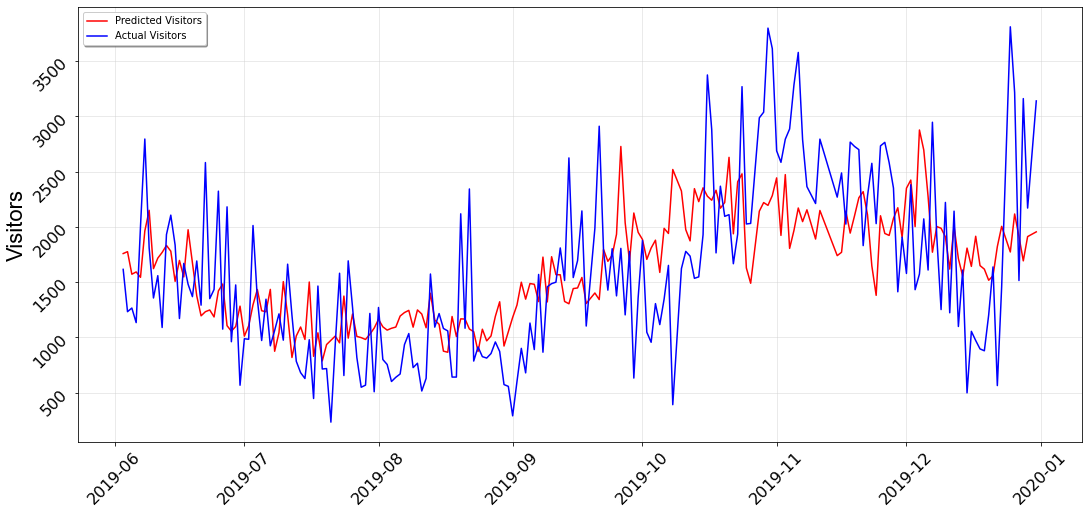

Sample rows:
             Prediction  Actual
Date                           
2019-09-23  1687.975617    1427
2019-10-10  2324.315000    1622
2019-07-11  1202.517415    1662
2019-08-13  1398.824375    1573
2019-10-20  2220.208765    2095
2019-07-28   997.109123     548
2019-06-22  1231.828298    2582
2019-12-04  2876.782523    1573
2019-10-30  2194.458548    3799
2019-10-17  2241.120591    2880


In [8]:
function.printRes(resTrain)
print()

function.printRes(resTest)

In [11]:
resTrain,resTest,coeffDf = function.mlrModelResTrainTestCoeff(dfWithoutLastYearVisits)
coeffDf


,0
Temperature,-698.62463
IsVacation,-555.90523
is_weekend,-131.05562
IsHoliday,143.60008
pm10,194.51282



rmse 745.3076673375676
std 809.1665472718446


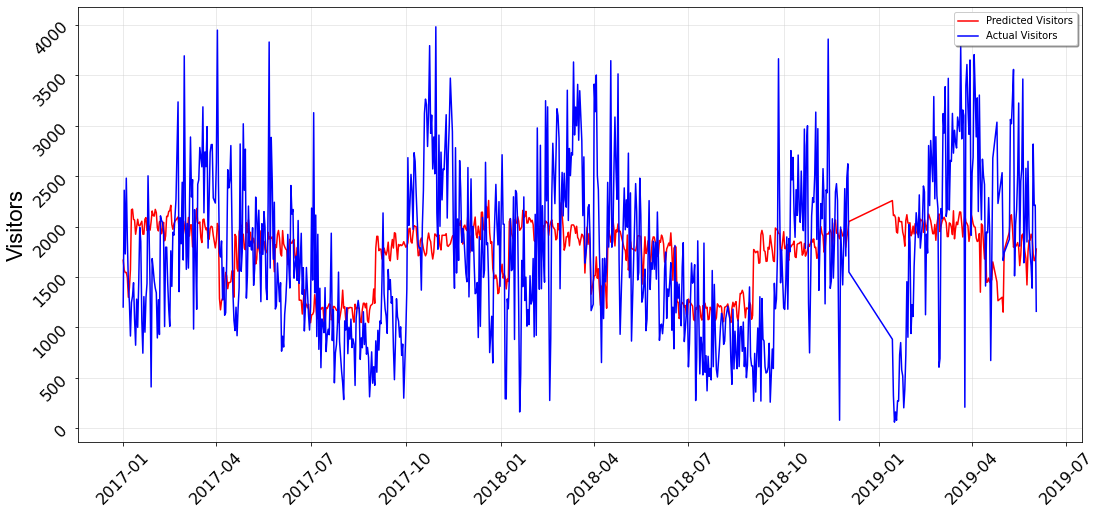

Sample rows:
             Prediction  Actual
Date                           
2018-10-23  1732.051273    2803
2017-05-02  2067.587955    2204
2018-11-19  2033.011464    1836
2019-04-11  2010.657618    2669
2017-12-08  1921.756189    1346
2018-10-11  1856.651845    2131
2017-04-02  2031.690125    3949
2019-03-02  2006.891661    2179
2019-04-13  1678.487452    2418
2019-02-22  1930.135573    2446

rmse 688.6107706606393
std 782.933047432456


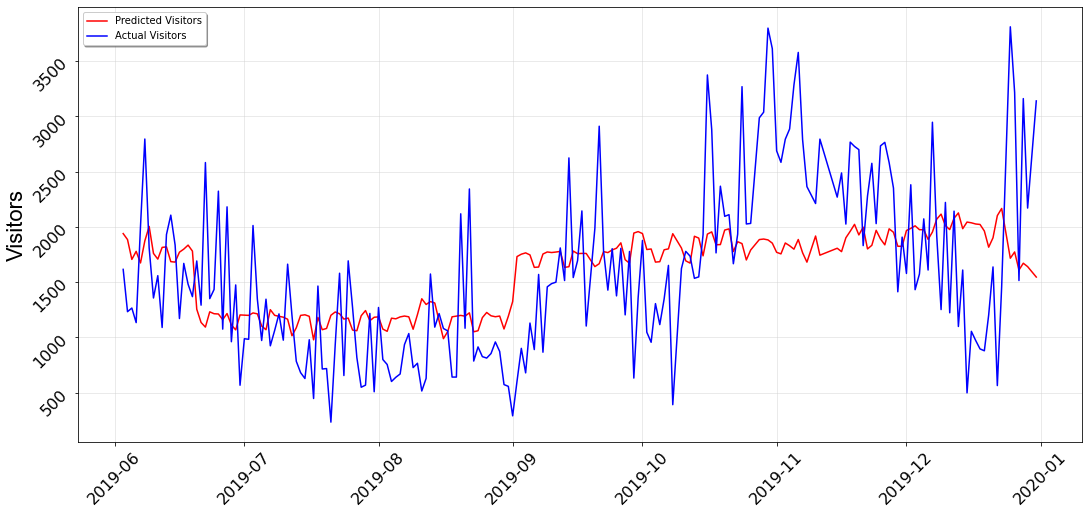

Sample rows:
             Prediction  Actual
Date                           
2019-12-22  2101.624323     563
2019-08-30  1075.366995     572
2019-12-15  2043.332530     497
2019-08-08  1185.493387    1034
2019-06-25  1210.998759    2323
2019-08-17  1052.706334    1058
2019-06-06  1778.258418    1133
2019-06-29  1067.240140    1474
2019-08-26  1224.809469     812
2019-12-21  1900.792574    1637


In [12]:
print()

function.printRes(resTrain)
print()

function.printRes(resTest)